## Домашнее задание №3 (курс "Практикум по программированию на языке Python")

__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [0]:
import numpy as np
import unittest
def task_1(arr):
    return np.all(arr >= 0)

In [0]:
# тесты
print(task_1(np.array([1, 2, 3])))
print(task_1(np.array([1, 2, -3])))

True
False


__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [0]:
def task_2(arr, n):
    return np.repeat(arr, n)

In [0]:
# тесты
print(task_2(np.array([1, 2]), 2))
print(task_2(np.array([1, 3]), 3))

[1 1 2 2]
[1 1 1 3 3 3]


__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [0]:
def task_3(V, v):
    pass

Для следующих нескольких заданий потребуются данные. Скачайте датасет, описывающий различные автомобили, из [репозитория UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/).

Соберите из `.dat` файлов один файл `car_data.csv`, который и будет использоваться далее. Будем решать задачу многоклассовой классификации, Везде, где это требуется, используйте подход One-vs-Rest.

Запустите следующий код на полученном файле с данными.

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', sep=' ', header=None)
dataset = dataset.drop([19], axis=1)

data = dataset.iloc[:, :-1]
target = dataset.iloc[:, -1]

print(data.shape, target.shape)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(752, 18) (752,)
(488, 18) (488,) (264, 18) (264,)


__Задание 4 (1.5 балла):__ Воспользуйтесь возможностями библиотеки pandas для того, чтобы произвести базовый анализ данных. Обоснованно ответьте на следующие вопросы/решите задачи:

- сколько признаков в данных, каких они типов?
- имеются ли пропущенные значения?
- для каждого числового признака посчитайте его среднее значение и стандартное отклонение

In [0]:
print('Колличество признаков', len(dataset.columns))
print('Имеются ли пропущенные значения?',dataset.isna().values.any())
print('для каждого числового признака посчитайте его среднее значение и стандартное отклонение:')
s1 = pd.Series(list(data.mean().values))
s2 = pd.Series(list(data.std().values))
d = {"mean":s1,
     "std": s2}
res = pd.DataFrame(d)
print(res)

Колличество признаков 19
Имеются ли пропущенные значения? False
для каждого числового признака посчитайте его среднее значение и стандартное отклонение:
          mean         std
0    93.426862    8.251375
1    44.775266    6.207789
2    81.751330   15.802311
3   168.051862   33.651559
4    61.586436    7.978365
5     8.534574    4.527928
6   168.172872   33.187189
7    41.102394    7.835451
8    20.538564    2.585652
9   147.803191   14.686102
10  187.948138   31.261983
11  436.466755  175.927957
12  174.204787   32.241649
13   72.537234    7.554944
14    6.361702    4.917646
15   12.695479    8.941239
16  188.836436    6.173575
17  195.523936    7.441165


__Задание 5 (1 балл):__ Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [0]:
# Нормализация признаков
# Разобьем категориальные признаки
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataset.iloc[:, -1] = labelencoder.fit_transform(dataset.iloc[:, -1])

data = dataset.iloc[:, :-1]
target = dataset.iloc[:, -1]

data_n = StandardScaler().fit_transform(data.values)
scaled_data = pd.DataFrame(data_n, index=data.index, columns=data.columns)
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.35)


__Задание 6 (2.5 балла):__ Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (не переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search хватит). Постройте графики ROC-кривой и кривой Precision-Recall для каждого класса (против прочих классов), оцените точность классификации и f1-score с разными порогами вероятности отнесения к классу. 

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='ovr'),
                     cv=3,
                     iid='deprecated',
                     param_grid={"C": [0.5, 1.0, 10.0, 100.0]},
                     scoring=make_scorer(f1_score, **{'average':'macro'}))

model.fit(X_train, y_train)

print(f1_score(y_test, model.predict(X_test), average='macro'))
print(f1_score(y_test, model.predict(X_test), average='micro'))
print(accuracy_score(y_test, model.predict(X_test)))

0.8166204013377927
0.8181818181818182
0.8181818181818182


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


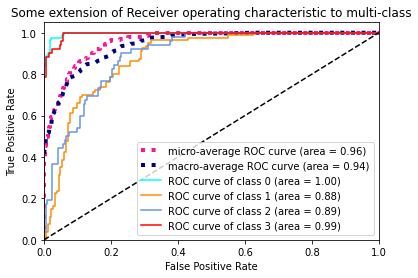

In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
from scipy import interp
from itertools import cycle

y_test_b = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_b.shape[1]

score = model.decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [0]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test_b, score)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_b[:, i],
                                                        score[:, i])
    average_precision[i] = average_precision_score(y_test_b[:, i], score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_b.ravel(),
    score.ravel())
average_precision["micro"] = average_precision_score(y_test_b, score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision-recall score: 0.83
Average precision score, micro-averaged over all classes: 0.89


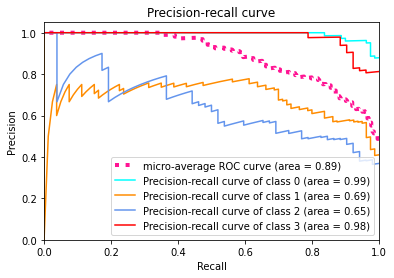

In [0]:
plt.figure()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color,
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
             ''.format(i, average_precision[i]))


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend(loc="lower right")
plt.show()


__Задание 7 (1.5 балла):__ Одним из методов понижения размерности данных является линейное преобразование PCA (метод главных компонент), идея которого заключается в том, чтобы спроецировать выборку на подпространство из тех признаков, по которым значение дисперсии наиболее велико.

- Ознакомьтесь с данным методом, затем примените реализацию из `sklearn` к обучающей выборке (train).
- Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент. 
- Визуализируйте данные в пространстве первых двух главных компонент.

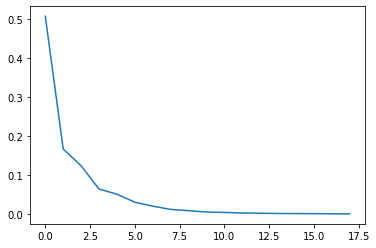

In [0]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=18)
X_new = X_train - X_train.var(axis=0)
pca.fit(X_new)
X_pca = pca.transform(X_new)
a = np.array([i for i in range(18)])
plt.plot(pca.explained_variance_ratio_)

In [0]:
pca = decomposition.PCA(n_components=2)
X_new = X_train - X_train.var(axis=0)
pca.fit(X_new)
X_pca = pca.transform(X_new)

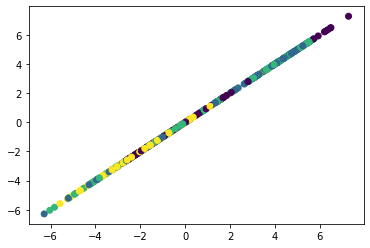

In [0]:
plt.scatter(X_pca[:, 0], X_pca[:, 0], c=y_train)

__Задание 8 (0.5 балла):__ Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор. Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`)

In [0]:
pca = decomposition.PCA(n_components=8)
X_new = X_train - X_train.var(axis=0)
pca.fit(X_new)
X_pca = pca.transform(X_new)

pca = decomposition.PCA(n_components=8)
X_new = X_test - X_test.var(axis=0)
pca.fit(X_new)
X_pca_test = pca.transform(X_new)

__Задание 9 (1 балл):__ Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете. Постройте графики ROC-кривой и кривой Precision-Recall для каждого класса (против прочих классов), оцените точность классификации и f1-score. 

In [0]:
model = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='ovr'),
                     cv=5,
                     iid='deprecated',
                     param_grid={"C": [0.5, 1.0, 10.0, 100.0]},
                     scoring=make_scorer(f1_score, **{'average':'macro'}))

model.fit(X_pca, y_train)

print(f1_score(y_test, model.predict(X_pca_test), average='macro'))
print(f1_score(y_test, model.predict(X_pca_test), average='micro'))
print(accuracy_score(y_test, model.predict(X_pca_test)))

0.5608279791576591
0.5643939393939394
0.5643939393939394


Для следующих заданий потребуется синтетическая выборка.

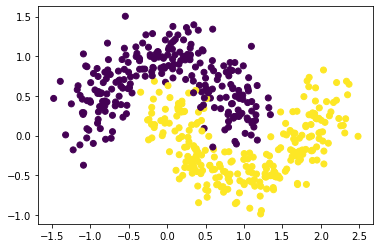

In [0]:
%matplotlib inline

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

__Задание 10 (1 балл):__ Попробуйте обучить на этих данных линейный SVM (используйте класс `svm.SVC`), померяйте качество в терминах метрик, рассмотренных выше. Изобразите разделяющую прямую (смотрите примеры в документации `sklearn`). Какие есть проблемы?

In [0]:
def plot_results(model, X, y, level=1.0, cmap_objects=plt.cm.OrRd, cmap_plot=plt.cm.OrRd,
                 use_decision_function=True, plot_logreg=False):
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(1, figsize=(7, 6))
    plt.clf()

    if hasattr(model, "support_vectors_"):
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=150,
                    facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=cmap_objects, s=50)

    plt.axis('tight')

    x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
    x_bound = np.abs(x_max - x_min) / 10.0
    x_min -= x_bound
    x_max += x_bound

    y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
    y_bound = np.abs(y_max - y_min) / 10.0
    y_min -= y_bound
    y_max += y_bound

    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

    use_Z = False
    if hasattr(model, "decision_function") and use_decision_function:
        Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
        use_Z = True
    elif hasattr(model, "predict"):
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        use_Z = True

    # Put the result into a color plot
    if use_Z:
        Z = Z.reshape(XX.shape)
        plt.figure(1, figsize=(7, 6))
        plt.pcolormesh(XX, YY, Z, cmap=cmap_plot)
        if hasattr(model, "support_vectors_"):
            plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-level, 0, level])
        elif plot_logreg:
            plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1e-10, 0, 1e+10])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.show()

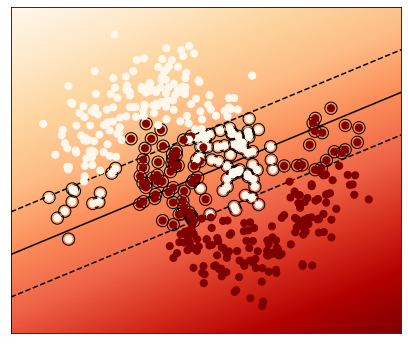

In [0]:
import sklearn.svm as svm
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.1)
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)
plot_results(model, X_train, y_train)

In [0]:
print(f1_score(y_test, model.predict(X_test), average='macro'))
print(f1_score(y_test, model.predict(X_test), average='micro'))
print(accuracy_score(y_test, model.predict(X_test)))

0.8181818181818181
0.82
0.82


__Задание 11 (2.5 балл):__ Применим ядровой переход. Попробуйте перебрать различные ядра (полиномиальное, rbf, сигмоидальное) и важные для них гиперпараметры, оптимизируя f1-меру на обучающих данных. Нарисуйте соответствующие графики зависимости качества от значений разных параметров. Для наилучшего набора измерьте/изобразите все описанные в предыдущих заданиях метрики (на тестовой выборке). Изобразите итоговую разделяющую поверхность для лучшего решения на всей выборке.

Ответьте на следующие вопросы:
- как изменилось качество классификации на тесте?
- какая степень полиномиального ядра оказалась лучшей? Почему?

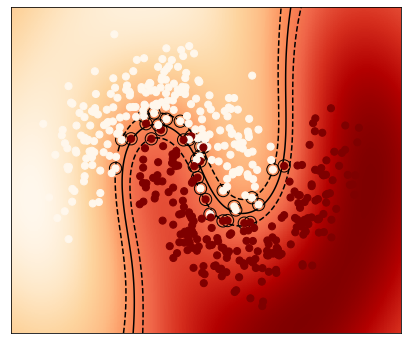

1.0
1.0
1.0


In [0]:
model1 = svm.SVC(kernel='rbf', C=100.0, gamma='auto')
model1.fit(X_train, y_train)
plot_results(model1, X_train, y_train)
print(f1_score(y_test, model1.predict(X_test), average='macro'))
print(f1_score(y_test, model1.predict(X_test), average='micro'))
print(accuracy_score(y_test, model1.predict(X_test)))

In [0]:
model2 = svm.SVC(kernel='poly', C=1.0, gamma=1.0)
model2.fit(X_train, y_train)
#plot_results(model2, X_train, y_train)
print(f1_score(y_test, model2.predict(X_test), average='macro'))
print(f1_score(y_test, model2.predict(X_test), average='micro'))
print(accuracy_score(y_test, model2.predict(X_test)))

0.8768472906403941
0.88
0.88


In [0]:
model3 = svm.SVC(kernel='sigmoid', C=1.0, gamma=1.0)
model3.fit(X_train, y_train)
#plot_results(model3, X_train, y_train)
print(f1_score(y_test, model3.predict(X_test), average='macro'))
print(f1_score(y_test, model3.predict(X_test), average='micro'))
print(accuracy_score(y_test, model3.predict(X_test)))

0.6161616161616161
0.62
0.62
